# Task 1 -  Prediction using Supervised ML
# Predict the percentage of marks of an student based on the number of study hours

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-dataset" data-toc-modified-id="Importing-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing dataset</a></span><ul class="toc-item"><li><span><a href="#Importing-required-libraries" data-toc-modified-id="Importing-required-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing required libraries</a></span></li><li><span><a href="#Importing-dataset" data-toc-modified-id="Importing-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing dataset</a></span></li><li><span><a href="#Inspecting-dataset" data-toc-modified-id="Inspecting-dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Inspecting dataset</a></span></li></ul></li><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Univariate Analysis</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li><li><span><a href="#Test-Train-Split" data-toc-modified-id="Test-Train-Split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test Train Split</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training the model</a></span><ul class="toc-item"><li><span><a href="#Training-using-Stats-model" data-toc-modified-id="Training-using-Stats-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Training using Stats model</a></span></li><li><span><a href="#Training-using-SK-Learn-package" data-toc-modified-id="Training-using-SK-Learn-package-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Training using SK Learn package</a></span></li></ul></li><li><span><a href="#Validating-Linear-Regression-assumptions" data-toc-modified-id="Validating-Linear-Regression-assumptions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Validating Linear Regression assumptions</a></span><ul class="toc-item"><li><span><a href="#Error-terms-should-be-normally-distributed-with-mean-0" data-toc-modified-id="Error-terms-should-be-normally-distributed-with-mean-0-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Error terms should be normally distributed with mean 0</a></span></li><li><span><a href="#Error-terms-should-be-randomly-distributed" data-toc-modified-id="Error-terms-should-be-randomly-distributed-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Error terms should be randomly distributed</a></span></li></ul></li><li><span><a href="#Predictions-on-the-model" data-toc-modified-id="Predictions-on-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predictions on the model</a></span><ul class="toc-item"><li><span><a href="#Predictions-using-stats-model" data-toc-modified-id="Predictions-using-stats-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Predictions using stats model</a></span></li><li><span><a href="#Using-SK-learn-model" data-toc-modified-id="Using-SK-learn-model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Using SK learn model</a></span></li></ul></li><li><span><a href="#Evaluating-the-model" data-toc-modified-id="Evaluating-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluating the model</a></span></li></ul></div>

## Importing dataset


### Importing required libraries

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Importing dataset

In [2]:
link = 'http://bit.ly/w-data'
marks_data = pd.read_csv(link)
marks_data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Inspecting dataset

In [3]:
# Checking shape
marks_data.shape

(25, 2)

In [4]:
# Checking info
marks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


`Conclusion:` There are no rows having nulls and data types for both the columns are appropriate

In [5]:
marks_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


`Conclusion:` Data dosen't seem to have outliers. Data is spread across evenly.

## Univariate Analysis

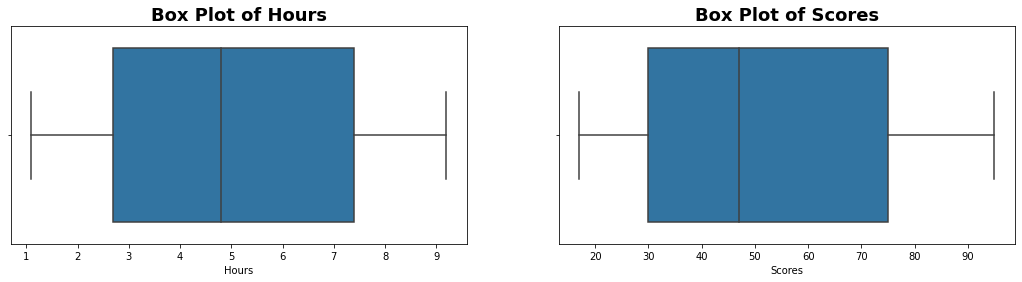

In [6]:
# Univariate analysis
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(x = 'Hours', data = marks_data)
plt.title('Box Plot of Hours', fontweight = 'bold', fontsize = 18)
plt.subplot(1,2,2)
sns.boxplot(x = 'Scores', data = marks_data)
plt.title('Box Plot of Scores',fontweight = 'bold', fontsize = 18)

plt.show()

`Conclusion:` There are no outliers present in the two columns

## Bivariate Analysis

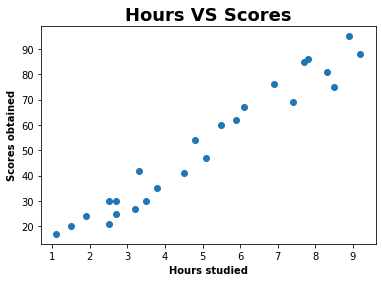

In [7]:
# Bivariate Analysis

plt.scatter(x = 'Hours', y = 'Scores' , data = marks_data)
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Hours VS Scores', fontweight = 'bold', fontsize = 18)
plt.show()

`Conclusion:` Hours and score do have a linear relationship between them. Hence we can go ahead and perform linear Regression for this dataset. Lets the correaltion factor between the two

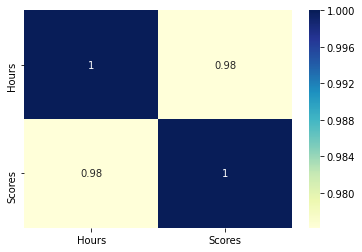

In [8]:
sns.heatmap(marks_data.corr(), annot = True, cmap='YlGnBu')
plt.show()

`Conclusion:` Hours and Score is highly positively correlated with a correlation factor of 0.98

## Test Train Split

In [9]:
# Creating X and Y sets 
X = marks_data['Hours']
y = marks_data['Scores']

In [10]:
# Performing test train split with 70-30 ratio
X_train, X_test,  y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)

In [11]:
# Checking the shapes for all the sets
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (17,)
X_test:  (8,)
y_train:  (17,)
y_test:  (8,)


## Training the model


### Training using Stats model

In [12]:
# Adding constant
X_train_sm = sm.add_constant(X_train)
# Buidling and fitting the model
lr_model = sm.OLS(y_train, X_train_sm).fit()
# Checking the models parameters
lr_model.params

const    1.495142
Hours    9.871714
dtype: float64

In [13]:
# Printing the model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           1.15e-11
Time:                        15:35:25   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

`Conclusion:` The p - value for Hours is significant as the p value is less than 0.05 and the r-square is also 95.7% which means that 95.7% of the variance in the data is being explained by hours variable

### Training using SK Learn package

In [14]:
# Reshaping X train set
X_train = X_train.values.reshape(-1,1)

In [15]:
# Building the model using SK Learn package
lr_model_sk = LinearRegression().fit(X_train,y_train)

In [16]:
# Displaying model parameters
print('Intercept of line: ',lr_model_sk.intercept_)
print('Coefficent of Hours: ',lr_model_sk.coef_)

Intercept of line:  1.495142109236383
Coefficent of Hours:  [9.87171443]


In [17]:
# Checking r - square of sklearn model
y_train_pred = lr_model_sk.predict(X_train)
r2score_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_score using sklearn model: ', (r2score_train)*100)

R2_score using sklearn model:  95.70735354094693


`Conclusion:`There is no difference between the results generated from stats model and sk learn package model. Just that we get additional information all consolidated at a single place

## Validating Linear Regression assumptions

### Error terms should be normally distributed with mean 0

In [18]:
#Error terms are normally distributed
res = y_train - y_train_pred

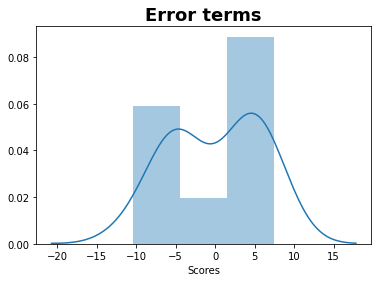

In [19]:
sns.distplot(res)
plt.title('Error terms',fontweight = 'bold', fontsize = 18)
plt.show()

`Conclusion:` It can be seen that the error terms are normally distributed with mean 0. Hence validated one of the assumptions of Linear Regression

### Error terms should be randomly distributed

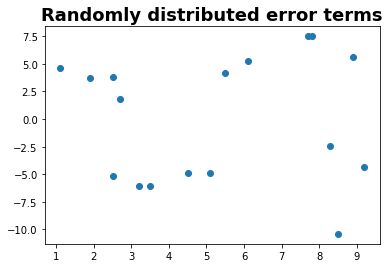

In [20]:
# Error terms should be randomly distributed

plt.scatter(X_train, res)
plt.title('Randomly distributed error terms',fontweight = 'bold', fontsize = 18)
plt.show()

`Conclusion:`Error terms/ residuals dont tend to follow any particular pattern as such. They seem to be distributed randomly. With this, validated another assumption for Linear Regression

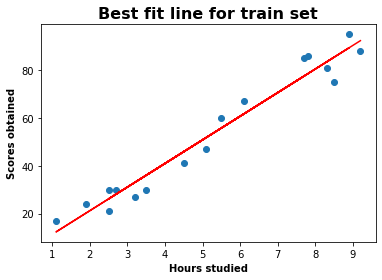

In [21]:
#Visualizing the fit on the train set
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Best fit line for train set', fontweight = 'bold', fontsize = 16)
plt.show()

## Predictions on the model

### Predictions using stats model

In [22]:
# Adding constant to X test set
X_test_sm = sm.add_constant(X_test)
# Making predictions on the trained stats model
y_test_pred = lr_model.predict(X_test_sm)

In [23]:
# Checking the r- squared on the test set using stats model
r2score = r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_score of test set using stats model: ', (r2score)*100)

R2_score of test set using stats model:  93.09458862687438


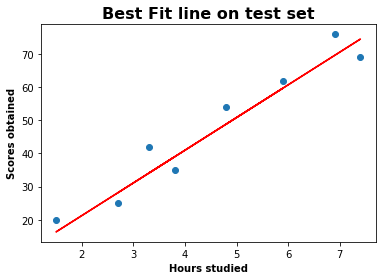

In [24]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Best Fit line on test set', fontweight = 'bold', fontsize = 16)
plt.show()

### Using SK learn model


In [25]:
# Reshaping the X test set
X_test = X_test.values.reshape(-1,1)

In [26]:
# Making predictions using sklearn model
y_test_pred_sk = lr_model_sk.predict(X_test)


In [27]:
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_pred_sk})
predicted_df

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


## Evaluating the model

In [28]:
# Checking the r- squared on the test set using sklearn model
r2score_sk = r2_score(y_true=y_test, y_pred=y_test_pred_sk)
print('R2_score of test set using SK Learn model: ', (r2score_sk)*100)

R2_score of test set using SK Learn model:  93.09458862687437


`Conclusion:` The R-square on the train set was 95.7%, whereas on the test set it is 93.09% which is acceptable. Hence, this model is performing well i.e. it has generalised the data well.